In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import tensorflow as tf

from tensorflow.keras.preprocessing import image

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D , Flatten
from tensorflow.keras.models import Sequential


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = ImageDataGenerator(rescale=1/255)
val = ImageDataGenerator(rescale=1/255)

In [ ]:
path='/content/drive/My Drive/sign_data/Train'
train_ds = train.flow_from_directory(
    path ,
    target_size=(64,64),
    batch_size=3,
    class_mode='binary'
)

path='/content/drive/My Drive/sign_data/Test'
val_ds = train.flow_from_directory(
    path ,
    target_size=(64,64),
    batch_size=3,
    class_mode='binary'
)

Found 1659 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
train_ds.class_indices

{'Fake': 0, 'Real': 1}

In [ ]:
train_ds.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(16 , (3,3) , activation='relu' , input_shape=(64,64,3)),
        tf.keras.layers.MaxPooling2D(2),

        tf.keras.layers.Conv2D(32 , (3,3) , activation='relu' ),
        tf.keras.layers.MaxPooling2D(2),

        tf.keras.layers.Conv2D(64, (3,3) , activation='relu' ),
        tf.keras.layers.MaxPooling2D(2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(500 , activation='relu'),
        tf.keras.layers.Dense(250 , activation='relu'),
        tf.keras.layers.Dense(1 , activation='sigmoid'),
    ]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0

In [ ]:
model.compile(loss='binary_crossentropy' , metrics=['acc'],optimizer='adam')

In [ ]:
model.fit(train_ds  , batch_size=32 ,validation_data=val_ds,epochs=10 )

Epoch 1/10
553/553 [==============================] - 608s 1s/step - loss: 0.4875 - acc: 0.7306 - val_loss: 0.2293 - val_acc: 0.9280
Epoch 2/10
553/553 [==============================] - 29s 52ms/step - loss: 0.1689 - acc: 0.9409 - val_loss: 0.2168 - val_acc: 0.9640
Epoch 3/10
553/553 [==============================] - 28s 50ms/step - loss: 0.1578 - acc: 0.9409 - val_loss: 0.0490 - val_acc: 0.9920
Epoch 4/10
553/553 [==============================] - 28s 51ms/step - loss: 0.1151 - acc: 0.9536 - val_loss: 0.0508 - val_acc: 0.9860
Epoch 5/10
553/553 [==============================] - 26s 47ms/step - loss: 0.0926 - acc: 0.9578 - val_loss: 0.0371 - val_acc: 0.9920
Epoch 6/10
553/553 [==============================] - 26s 48ms/step - loss: 0.0832 - acc: 0.9681 - val_loss: 0.0081 - val_acc: 0.9980
Epoch 7/10
553/553 [==============================] - 28s 51ms/step - loss: 0.0649 - acc: 0.9735 - val_loss: 0.0190 - val_acc: 0.9920
Epoch 8/10
553/553 [==============================] - 28s 51ms/

In [ ]:
model.save('signature.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


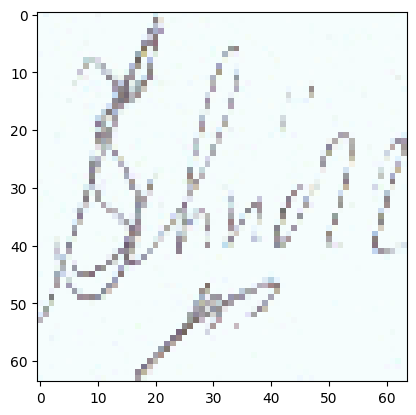

In [ ]:
plt.imshow(val_ds[0][0][0])

In [ ]:
pred=model.predict(val_ds)

167/167 [==============================] - 5s 31ms/step


In [ ]:
val_ds.class_indices

{'Fake': 0, 'Real': 1}

In [ ]:
val_ds.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
pred

array([[9.99551356e-01],
       [9.99574661e-01],
       [2.04727516e-17],
       [9.99527454e-01],
       [9.99241054e-01],
       [9.99572694e-01],
       [4.98456757e-06],
       [9.31832008e-03],
       [9.99599457e-01],
       [9.99594688e-01],
       [7.26727583e-03],
       [2.64612443e-09],
       [2.23021373e-01],
       [2.62275137e-07],
       [2.38930449e-01],
       [9.99598861e-01],
       [1.07572541e-05],
       [9.99276280e-01],
       [5.55748306e-03],
       [9.99597728e-01],
       [4.41175091e-12],
       [2.78368723e-02],
       [9.99576509e-01],
       [9.95139420e-01],
       [9.99630690e-01],
       [5.95057870e-09],
       [9.99817014e-01],
       [4.04436332e-06],
       [9.26366920e-05],
       [5.79761982e-01],
       [2.82218000e-08],
       [9.99523044e-01],
       [2.58727311e-13],
       [5.35283657e-03],
       [9.99595642e-01],
       [3.83572549e-11],
       [9.99600053e-01],
       [4.00954299e-03],
       [9.99607086e-01],
       [7.36765869e-05],
